In [1]:
# Comparative Study of TN AND TL
import pandas as pd 
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
import itertools
import warnings
import glob ,os 
import statsmodels.api as sm
from sklearn import linear_model

In [2]:
maha=pd.read_csv("telangana.csv")
maha

,Year,GAV Agri,GAV Manf,GAV Cons,GAV Ind,GAV banking,GAV Services,GDP/Capita
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2011.0,3236819.0,6215158.0,2279090.0,10383862.0,2126507.0,17759661.0,35943411.0
2,2012.0,3554096.0,5259759.0,2314468.0,9384634.0,2332282.0,19259624.0,37011312.0
3,2013.0,3723456.0,5218160.0,2136705.0,9306422.0,2564472.0,20943951.0,38995678.0
4,2014.0,2954636.0,4827558.0,2333163.0,9083520.0,2869868.0,23642720.0,41633207.0
5,2015.0,2418653.0,6375078.0,2398644.0,10903697.0,3090552.0,26319052.0,46454244.0
6,2016.0,2847772.0,6494309.0,2435509.0,11017301.0,3378179.0,29204169.0,50794610.0
7,2017.0,3139537.0,7095034.0,2784477.0,12370500.0,3511919.0,31421367.0,55740976.0
8,2018.0,2937525.0,8268600.0,2905319.0,14243387.0,3529390.0,33626248.0,60840139.0
9,2019.0,4569098.0,8104451.0,2759225.0,13786312.0,3579502.0,35526398.0,64124429.0


In [3]:
MP=pd.read_csv("TN.csv")
MP

,Year,GAV Agri,GAV Manf,GAV Cons,GAV Ind,GAV banking,GAV Services,GDP/Capita
0,2011,5375639,15176801,9247221,25546469,4019599,34982521,75148576
1,2012,4218362,16945553,9268389,27310251,4407747,37378289,79182431
2,2013,5048372,16632909,10030098,27781443,4920896,40725561,85197558
3,2014,5248786,16209238,10122449,27393094,5424269,44270500,89391507
4,2015,5004574,19970561,10666070,31813843,5569766,46001730,96756246
5,2016,3503454,22451412,11337286,35054682,5715879,48966757,103676212
6,2017,4493518,24898500,11780600,38116505,6387307,52205510,112579344
7,2018,4622819,26968103,12450920,41011132,6637789,55157012,120466736
8,2019,5050932,26797294,12896648,41202534,6845974,57541400,124383550
9,2020,5401440,26531635,12921878,40736751,7187848,57316293,124559515


In [4]:
maha.shape


(12, 8)

In [5]:
MP.shape

(11, 8)

In [6]:
maha.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          11 non-null     float64
 1   GAV Agri      11 non-null     float64
 2   GAV Manf      11 non-null     float64
 3   GAV Cons      11 non-null     float64
 4   GAV Ind       11 non-null     float64
 5   GAV banking   11 non-null     float64
 6   GAV Services  11 non-null     float64
 7   GDP/Capita    11 non-null     float64
dtypes: float64(8)
memory usage: 896.0 bytes


In [7]:
MP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Year          11 non-null     int64
 1   GAV Agri      11 non-null     int64
 2   GAV Manf      11 non-null     int64
 3   GAV Cons      11 non-null     int64
 4   GAV Ind       11 non-null     int64
 5   GAV banking   11 non-null     int64
 6   GAV Services  11 non-null     int64
 7   GDP/Capita    11 non-null     int64
dtypes: int64(8)
memory usage: 832.0 bytes


In [8]:
mean_gdp=maha['GDP/Capita'].mean()
mean_gdp

50923741.0

In [9]:
mean_gdp=MP['GDP/Capita'].mean()
mean_gdp

104168409.18181819

In [10]:
std_gdp=maha['GDP/Capita'].std()
std_gdp

11588132.190243231

In [11]:
std_gdp=MP['GDP/Capita'].std()
std_gdp

20448405.639804088

In [12]:
# GDP growth rate 
maha['Growth Rate']=maha['GDP/Capita'].pct_change()*100
maha

,Year,GAV Agri,GAV Manf,GAV Cons,GAV Ind,GAV banking,GAV Services,GDP/Capita,Growth Rate
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2011.0,3236819.0,6215158.0,2279090.0,10383862.0,2126507.0,17759661.0,35943411.0,NaN
2,2012.0,3554096.0,5259759.0,2314468.0,9384634.0,2332282.0,19259624.0,37011312.0,2.971062
3,2013.0,3723456.0,5218160.0,2136705.0,9306422.0,2564472.0,20943951.0,38995678.0,5.361512
4,2014.0,2954636.0,4827558.0,2333163.0,9083520.0,2869868.0,23642720.0,41633207.0,6.763644
5,2015.0,2418653.0,6375078.0,2398644.0,10903697.0,3090552.0,26319052.0,46454244.0,11.579788
6,2016.0,2847772.0,6494309.0,2435509.0,11017301.0,3378179.0,29204169.0,50794610.0,9.343314
7,2017.0,3139537.0,7095034.0,2784477.0,12370500.0,3511919.0,31421367.0,55740976.0,9.737974
8,2018.0,2937525.0,8268600.0,2905319.0,14243387.0,3529390.0,33626248.0,60840139.0,9.147961
9,2019.0,4569098.0,8104451.0,2759225.0,13786312.0,3579502.0,35526398.0,64124429.0,5.398229


In [13]:
# GDP growth rate 
MP['Growth Rate']=MP['GDP/Capita'].pct_change()*100
MP

,Year,GAV Agri,GAV Manf,GAV Cons,GAV Ind,GAV banking,GAV Services,GDP/Capita,Growth Rate
0,2011,5375639,15176801,9247221,25546469,4019599,34982521,75148576,NaN
1,2012,4218362,16945553,9268389,27310251,4407747,37378289,79182431,5.367840
2,2013,5048372,16632909,10030098,27781443,4920896,40725561,85197558,7.596542
3,2014,5248786,16209238,10122449,27393094,5424269,44270500,89391507,4.922616
4,2015,5004574,19970561,10666070,31813843,5569766,46001730,96756246,8.238746
5,2016,3503454,22451412,11337286,35054682,5715879,48966757,103676212,7.151958
6,2017,4493518,24898500,11780600,38116505,6387307,52205510,112579344,8.587440
7,2018,4622819,26968103,12450920,41011132,6637789,55157012,120466736,7.006074
8,2019,5050932,26797294,12896648,41202534,6845974,57541400,124383550,3.251366
9,2020,5401440,26531635,12921878,40736751,7187848,57316293,124559515,0.141470


In [14]:
Avg_Growth_Rate=maha['Growth Rate'].mean()
Avg_Growth_Rate

6.6302442615634

In [15]:
Avg_Growth_Rate=MP['Growth Rate'].mean()
Avg_Growth_Rate

6.025325260930912

In [16]:
null_values=maha.isnull().sum()
print(null_values)

Year            1
GAV Agri        1
GAV Manf        1
GAV Cons        1
GAV Ind         1
GAV banking     1
GAV Services    1
GDP/Capita      1
Growth Rate     2
dtype: int64


In [17]:
#Finding Null values 
null_values=MP.isnull().sum()
print(null_values)

Year            0
GAV Agri        0
GAV Manf        0
GAV Cons        0
GAV Ind         0
GAV banking     0
GAV Services    0
GDP/Capita      0
Growth Rate     1
dtype: int64


In [18]:
#Deleting the 0th row
maha=maha.drop(0)
maha

,Year,GAV Agri,GAV Manf,GAV Cons,GAV Ind,GAV banking,GAV Services,GDP/Capita,Growth Rate
1,2011.0,3236819.0,6215158.0,2279090.0,10383862.0,2126507.0,17759661.0,35943411.0,NaN
2,2012.0,3554096.0,5259759.0,2314468.0,9384634.0,2332282.0,19259624.0,37011312.0,2.971062
3,2013.0,3723456.0,5218160.0,2136705.0,9306422.0,2564472.0,20943951.0,38995678.0,5.361512
4,2014.0,2954636.0,4827558.0,2333163.0,9083520.0,2869868.0,23642720.0,41633207.0,6.763644
5,2015.0,2418653.0,6375078.0,2398644.0,10903697.0,3090552.0,26319052.0,46454244.0,11.579788
6,2016.0,2847772.0,6494309.0,2435509.0,11017301.0,3378179.0,29204169.0,50794610.0,9.343314
7,2017.0,3139537.0,7095034.0,2784477.0,12370500.0,3511919.0,31421367.0,55740976.0,9.737974
8,2018.0,2937525.0,8268600.0,2905319.0,14243387.0,3529390.0,33626248.0,60840139.0,9.147961
9,2019.0,4569098.0,8104451.0,2759225.0,13786312.0,3579502.0,35526398.0,64124429.0,5.398229
10,2020.0,4569791.0,7919043.0,2667893.0,13188817.0,3715217.0,32910489.0,60992733.0,-4.883780


In [32]:
maha.shape

(11, 9)

In [33]:
MP.shape

(11, 9)

In [19]:
#Handling Missing Values 
# Interpolation
maha['GAV Agri']=maha['GAV Agri'].interpolate()
maha['GAV Manf']=maha['GAV Manf'].interpolate()
maha['GAV Cons']=maha['GAV Cons'].interpolate()
maha['GAV Ind']=maha['GAV Ind'].interpolate()
#maha['GAV banking']=maha['GAV banking'].interpolate()
maha['GAV Services']=maha['GAV Services'].interpolate()
maha['GDP/Capita']=maha['GDP/Capita'].interpolate()
maha['Growth Rate']=maha['Growth Rate'].interpolate()
maha['GAV banking']=maha['GAV banking'].interpolate()
maha

,Year,GAV Agri,GAV Manf,GAV Cons,GAV Ind,GAV banking,GAV Services,GDP/Capita,Growth Rate
1,2011.0,3236819.0,6215158.0,2279090.0,10383862.0,2126507.0,17759661.0,35943411.0,NaN
2,2012.0,3554096.0,5259759.0,2314468.0,9384634.0,2332282.0,19259624.0,37011312.0,2.971062
3,2013.0,3723456.0,5218160.0,2136705.0,9306422.0,2564472.0,20943951.0,38995678.0,5.361512
4,2014.0,2954636.0,4827558.0,2333163.0,9083520.0,2869868.0,23642720.0,41633207.0,6.763644
5,2015.0,2418653.0,6375078.0,2398644.0,10903697.0,3090552.0,26319052.0,46454244.0,11.579788
6,2016.0,2847772.0,6494309.0,2435509.0,11017301.0,3378179.0,29204169.0,50794610.0,9.343314
7,2017.0,3139537.0,7095034.0,2784477.0,12370500.0,3511919.0,31421367.0,55740976.0,9.737974
8,2018.0,2937525.0,8268600.0,2905319.0,14243387.0,3529390.0,33626248.0,60840139.0,9.147961
9,2019.0,4569098.0,8104451.0,2759225.0,13786312.0,3579502.0,35526398.0,64124429.0,5.398229
10,2020.0,4569791.0,7919043.0,2667893.0,13188817.0,3715217.0,32910489.0,60992733.0,-4.883780


In [20]:
# #Handling Missing Values 
# # Interpolation
# MP['GAV Agri']=MP['GAV Agri'].interpolate()
# MP['GAV Manf']=MP['GAV Manf'].interpolate()
# MP['GAV Cons']=MP['GAV Cons'].interpolate()
# MP['GAV Ind']=MP['GAV Ind'].interpolate()
# #maha['GAV banking']=maha['GAV banking'].interpolate()
# MP['GAV Services']=MP['GAV Services'].interpolate()
# MP['GDP/Capita']=MP['GDP/Capita'].interpolate()
# MP['Growth Rate']=MP['Growth Rate'].interpolate()
# MP['GAV banking']=MP['GAV banking'].interpolate()
# MP

In [21]:
# Covariance of different variable with respect to GDP/Capita

In [22]:
cov_Agri=maha['GAV Agri'].cov(maha['GDP/Capita'])
cov_Agri

4200102886183.7

In [23]:
cov_Agri=MP['GAV Agri'].cov(MP['GDP/Capita'])
cov_Agri

2074611129660.8271

In [24]:
cov_Manf=maha['GAV Manf'].cov(maha['GDP/Capita'])
cov_Manf

14678686739045.602

In [25]:
cov_Manf=MP['GAV Manf'].cov(MP['GDP/Capita'])
cov_Manf

104287340765698.86

In [26]:
cov_Cons=maha['GAV Cons'].cov(maha['GDP/Capita'])
cov_Cons

2589385424607.9995

In [27]:
cov_Cons=MP['GAV Cons'].cov(MP['GDP/Capita'])
cov_Cons

32207545495262.688

In [28]:
cov_Ind=maha['GAV Ind'].cov(maha['GDP/Capita'])
cov_Ind

22361077827874.004

In [29]:
cov_Ind=MP['GAV Ind'].cov(MP['GDP/Capita'])
cov_Ind

139341175836609.94

In [34]:
cov_banking=maha['GAV banking'].cov(maha['GDP/Capita'])
cov_banking

6997907303485.301

In [35]:
cov_banking=MP['GAV banking '].cov(MP['GDP/Capita'])
cov_banking

23527332024234.625

In [36]:
cov_Services=maha['GAV Services'].cov(maha['GDP/Capita'])
cov_Services

77896861083650.2

In [37]:
cov_Services=MP['GAV Services'].cov(MP['GDP/Capita'])
cov_Services

178696067119967.62

In [38]:
# Correlation

corr_Agri=maha['GAV Agri'].corr(maha['GDP/Capita'])
corr_Agri

0.49149433274202725

In [39]:
corr_Agri=MP['GAV Agri'].corr(MP['GDP/Capita'])
corr_Agri

0.16579440674247672

In [40]:
corr_Manf=maha['GAV Manf'].corr(maha['GDP/Capita'])
corr_Manf

0.9319682253475646

In [41]:
corr_Manf=MP['GAV Manf'].corr(MP['GDP/Capita'])
corr_Manf

0.9837787874846929

In [42]:
corr_Cons=maha['GAV Cons'].corr(maha['GDP/Capita'])
corr_Cons

0.890249719556359

In [43]:
corr_Cons=MP['GAV Cons'].corr(MP['GDP/Capita'])
corr_Cons

0.996494845775734

In [45]:
corr_banking=maha['GAV banking'].corr(maha['GDP/Capita'])
corr_banking

0.9604042581830311

In [46]:
corr_banking=MP['GAV banking '].corr(MP['GDP/Capita'])
corr_banking

0.9878770245710857

In [47]:
corr_Ind=maha['GAV Ind'].corr(maha['GDP/Capita'])
corr_Ind

0.9505501603959688

In [48]:
corr_Ind=MP['GAV Ind'].corr(MP['GDP/Capita'])
corr_Ind

0.9900604125488566

In [49]:
corr_Services=maha['GAV Services'].corr(maha['GDP/Capita'])
corr_Services

0.991135173105014

In [50]:
corr_Services=MP['GAV Services'].corr(MP['GDP/Capita'])
corr_Services

0.9956602369393488

Text(0, 0.5, 'GDP/Capita')

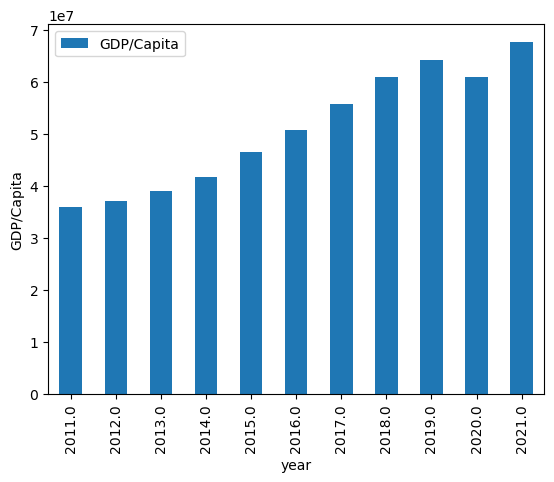

In [51]:
#Plotting grpah of year vs GDP
maha.plot.bar(x='Year',y='GDP/Capita')
plt.xlabel('year')
plt.ylabel('GDP/Capita')

Text(0, 0.5, 'GDP/ Capita')

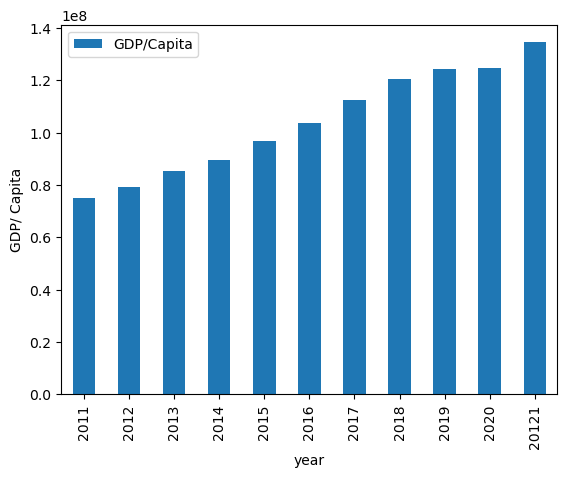

In [52]:
#Plotting grpah of year vs GDP
MP.plot.bar(x='Year',y='GDP/Capita')
plt.xlabel('year')
plt.ylabel('GDP/ Capita')

In [54]:
x=maha[['GAV Agri','GAV Manf','GAV Ind','GAV Services','GAV Cons','GAV banking']]
y=maha['GDP/Capita']
regr=linear_model.LinearRegression()
regr.fit(x,y)
print(regr.coef_)
MH_coeff=regr.coef_
MH_coeff

[ 1.36047425 -0.47206159  1.86212235  0.93854727  0.27660591  2.86034432]


array([ 1.36047425, -0.47206159,  1.86212235,  0.93854727,  0.27660591,
        2.86034432])

In [55]:
x=MP[['GAV Agri','GAV Manf','GAV Ind','GAV Services','GAV Cons','GAV banking ']]
y=MP['GDP/Capita']
regr=linear_model.LinearRegression()
regr.fit(x,y)
print(regr.coef_)
MP_coeff=regr.coef_
MP_coeff

[0.89559251 0.55163111 0.65264193 1.05995193 1.88919605 0.74523397]


array([0.89559251, 0.55163111, 0.65264193, 1.05995193, 1.88919605,
       0.74523397])

Text(0.5, 1.0, 'Year vs GAV Agri')

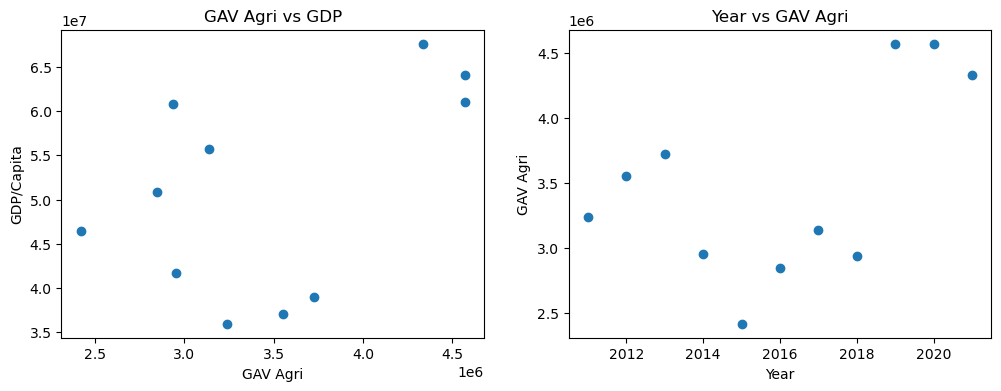

In [56]:
# Create subplots for each independent factor
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Plot Factor1 against GDP
axs[0].scatter(maha['GAV Agri'], maha['GDP/Capita'])
axs[0].set_xlabel('GAV Agri')
axs[0].set_ylabel('GDP/Capita')
axs[0].set_title('GAV Agri vs GDP')


axs[1].scatter(maha['Year'], maha['GAV Agri'])
axs[1].set_xlabel('Year')
axs[1].set_ylabel('GAV Agri')
axs[1].set_title('Year vs GAV Agri')

Text(0.5, 1.0, 'Year vs GAV Agri')

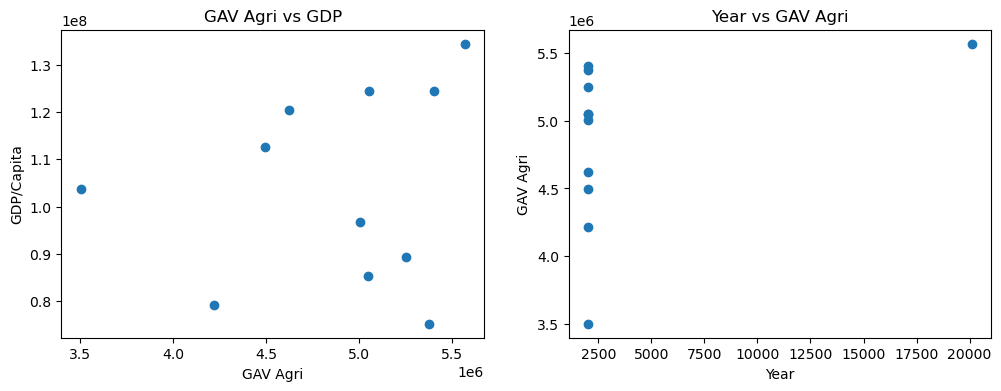

In [58]:
# Create subplots for each independent factor
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Plot Factor1 against GDP
axs[0].scatter(MP['GAV Agri'], MP['GDP/Capita'])
axs[0].set_xlabel('GAV Agri')
axs[0].set_ylabel('GDP/Capita')
axs[0].set_title('GAV Agri vs GDP')


axs[1].scatter(MP['Year'], MP['GAV Agri'])
axs[1].set_xlabel('Year')
axs[1].set_ylabel('GAV Agri')
axs[1].set_title('Year vs GAV Agri')

Text(0.5, 1.0, 'Year vs GAV Services')

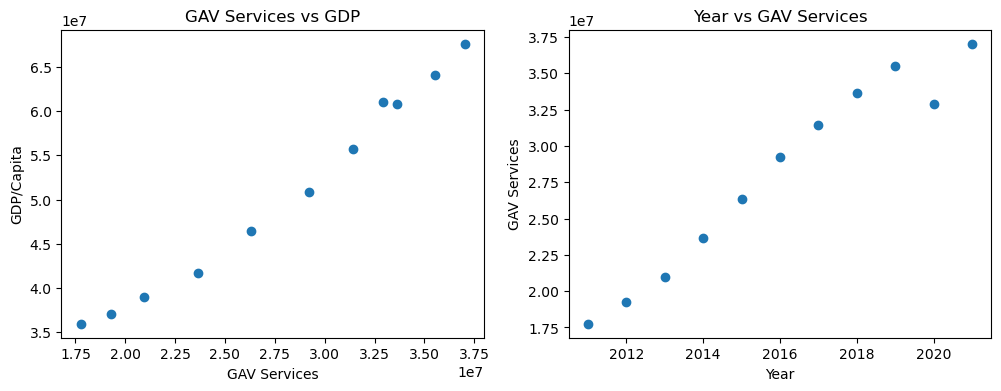

In [59]:
# Create subplots for each independent factor
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Plot Factor1 against GDP
axs[0].scatter(maha['GAV Services'], maha['GDP/Capita'])
axs[0].set_xlabel('GAV Services')
axs[0].set_ylabel('GDP/Capita')
axs[0].set_title('GAV Services vs GDP')


axs[1].scatter(maha['Year'], maha['GAV Services'])
axs[1].set_xlabel('Year')
axs[1].set_ylabel('GAV Services')
axs[1].set_title('Year vs GAV Services')

Text(0.5, 1.0, 'Year vs GAV Services')

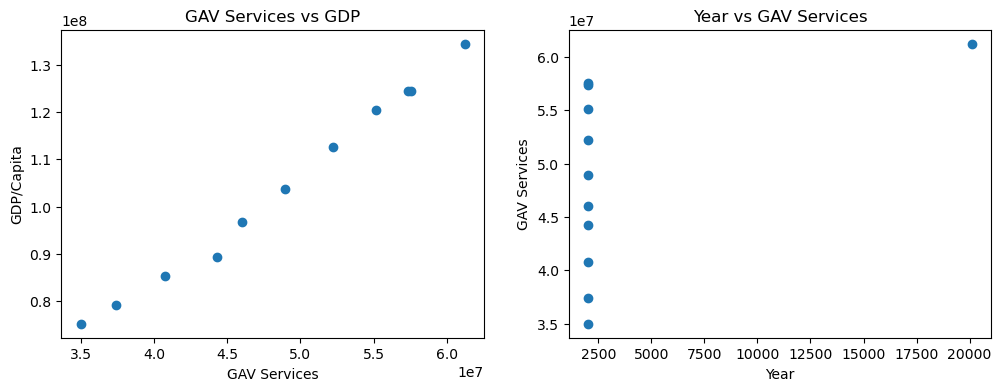

In [60]:
# Create subplots for each independent factor
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Plot Factor1 against GDP
axs[0].scatter(MP['GAV Services'], MP['GDP/Capita'])
axs[0].set_xlabel('GAV Services')
axs[0].set_ylabel('GDP/Capita')
axs[0].set_title('GAV Services vs GDP')


axs[1].scatter(MP['Year'], MP['GAV Services'])
axs[1].set_xlabel('Year')
axs[1].set_ylabel('GAV Services')
axs[1].set_title('Year vs GAV Services')

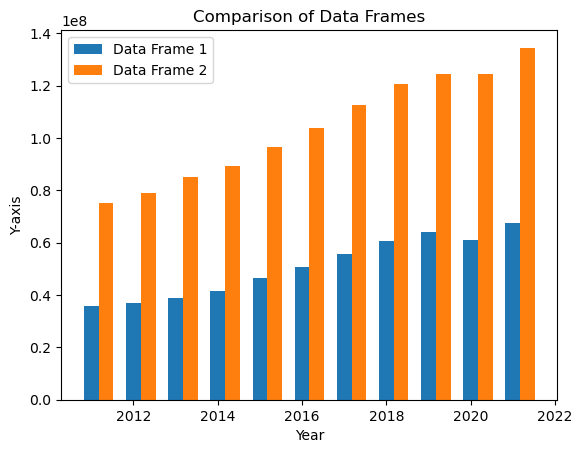

In [61]:



# Set the x-axis values (assuming you have categorical data for the x-axis)
x = maha['Year']

# Set the width of each bar
bar_width = 0.35

# Plotting bars for df1
plt.bar(x, maha['GDP/Capita'], width=bar_width, label='Data Frame 1')

# Plotting bars for df2 with an offset
plt.bar(x + bar_width, MP['GDP/Capita'], width=bar_width, label='Data Frame 2')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Y-axis')
plt.title('Comparison of Data Frames')

# Set the x-axis tick labels
#plt.xticks(x + bar_width / 2, maha['x'])

# Display legend
plt.legend()

# Show the plot
plt.show()


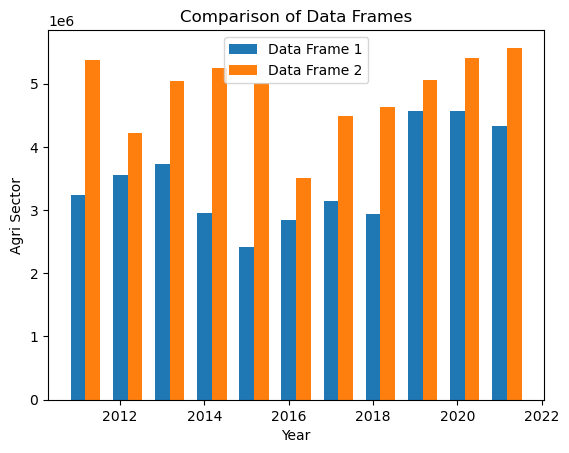

In [62]:
# Set the x-axis values (assuming you have categorical data for the x-axis)
x = maha['Year']

# Set the width of each bar
bar_width = 0.35

# Plotting bars for df1
plt.bar(x, maha['GAV Agri'], width=bar_width, label='Data Frame 1')

# Plotting bars for df2 with an offset
plt.bar(x + bar_width, MP['GAV Agri'], width=bar_width, label='Data Frame 2')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Agri Sector')
plt.title('Comparison of Data Frames')

# Set the x-axis tick labels
#plt.xticks(x + bar_width / 2, maha['x'])

# Display legend
plt.legend()

# Show the plot
plt.show()

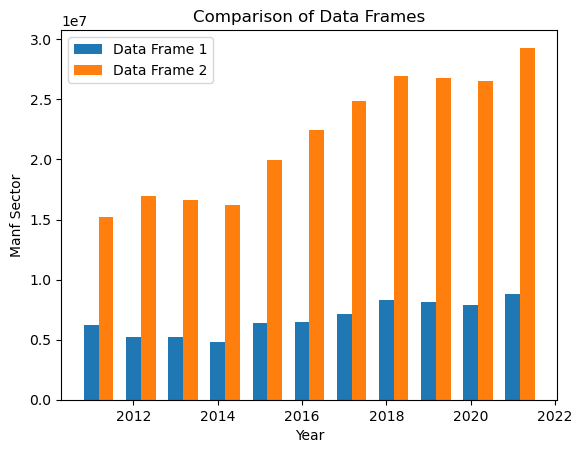

In [63]:
# Set the x-axis values (assuming you have categorical data for the x-axis)
x = maha['Year']

# Set the width of each bar
bar_width = 0.35

# Plotting bars for df1
plt.bar(x, maha['GAV Manf'], width=bar_width, label='Data Frame 1')

# Plotting bars for df2 with an offset
plt.bar(x + bar_width, MP['GAV Manf'], width=bar_width, label='Data Frame 2')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Manf Sector')
plt.title('Comparison of Data Frames')

# Set the x-axis tick labels
#plt.xticks(x + bar_width / 2, maha['x'])

# Display legend
plt.legend()

# Show the plot
plt.show()

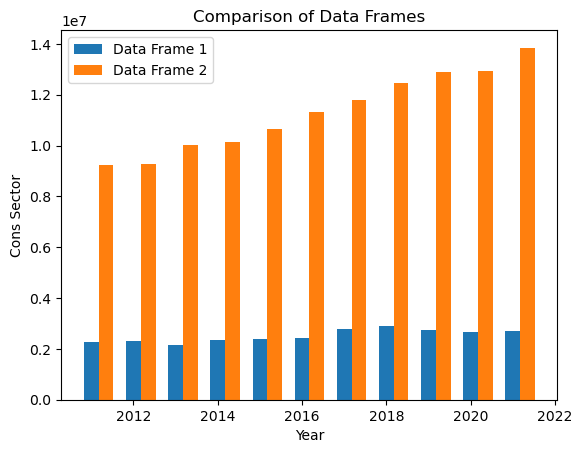

In [64]:
# Set the x-axis values (assuming you have categorical data for the x-axis)
x = maha['Year']

# Set the width of each bar
bar_width = 0.35

# Plotting bars for df1
plt.bar(x, maha['GAV Cons'], width=bar_width, label='Data Frame 1')

# Plotting bars for df2 with an offset
plt.bar(x + bar_width, MP['GAV Cons'], width=bar_width, label='Data Frame 2')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Cons Sector')
plt.title('Comparison of Data Frames')

# Set the x-axis tick labels
#plt.xticks(x + bar_width / 2, maha['x'])

# Display legend
plt.legend()

# Show the plot
plt.show()

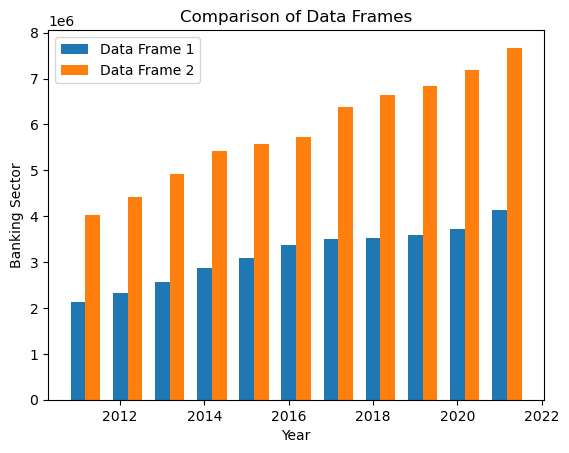

In [66]:
# Set the x-axis values (assuming you have categorical data for the x-axis)
x = maha['Year']

# Set the width of each bar
bar_width = 0.35

# Plotting bars for df1
plt.bar(x, maha['GAV banking'], width=bar_width, label='Data Frame 1')

# Plotting bars for df2 with an offset
plt.bar(x + bar_width, MP['GAV banking '], width=bar_width, label='Data Frame 2')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Banking Sector')
plt.title('Comparison of Data Frames')

# Set the x-axis tick labels
#plt.xticks(x + bar_width / 2, maha['x'])

# Display legend
plt.legend()

# Show the plot
plt.show()

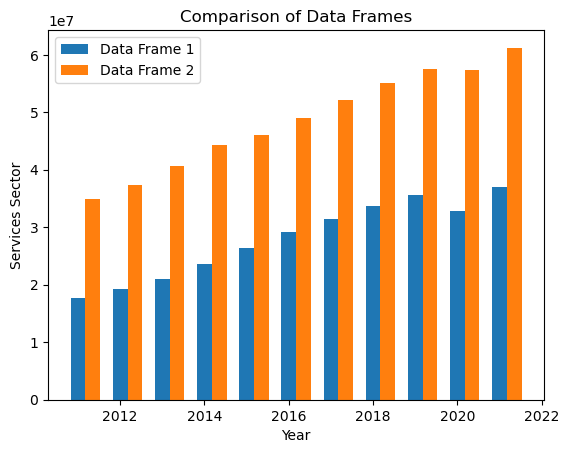

In [67]:
# Set the x-axis values (assuming you have categorical data for the x-axis)
x = maha['Year']

# Set the width of each bar
bar_width = 0.35

# Plotting bars for df1
plt.bar(x, maha['GAV Services'], width=bar_width, label='Data Frame 1')

# Plotting bars for df2 with an offset
plt.bar(x + bar_width, MP['GAV Services'], width=bar_width, label='Data Frame 2')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Services Sector')
plt.title('Comparison of Data Frames')

# Set the x-axis tick labels
#plt.xticks(x + bar_width / 2, maha['x'])

# Display legend
plt.legend()

# Show the plot
plt.show()

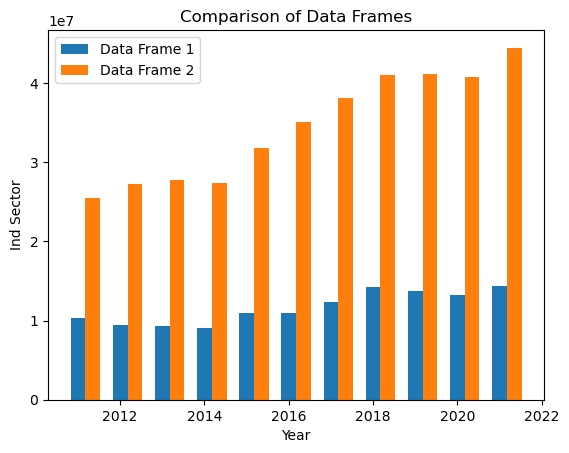

In [68]:
# Set the x-axis values (assuming you have categorical data for the x-axis)
x = maha['Year']

# Set the width of each bar
bar_width = 0.35

# Plotting bars for df1
plt.bar(x, maha['GAV Ind'], width=bar_width, label='Data Frame 1')

# Plotting bars for df2 with an offset
plt.bar(x + bar_width, MP['GAV Ind'], width=bar_width, label='Data Frame 2')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Ind Sector')
plt.title('Comparison of Data Frames')

# Set the x-axis tick labels
#plt.xticks(x + bar_width / 2, maha['x'])

# Display legend
plt.legend()

# Show the plot
plt.show()

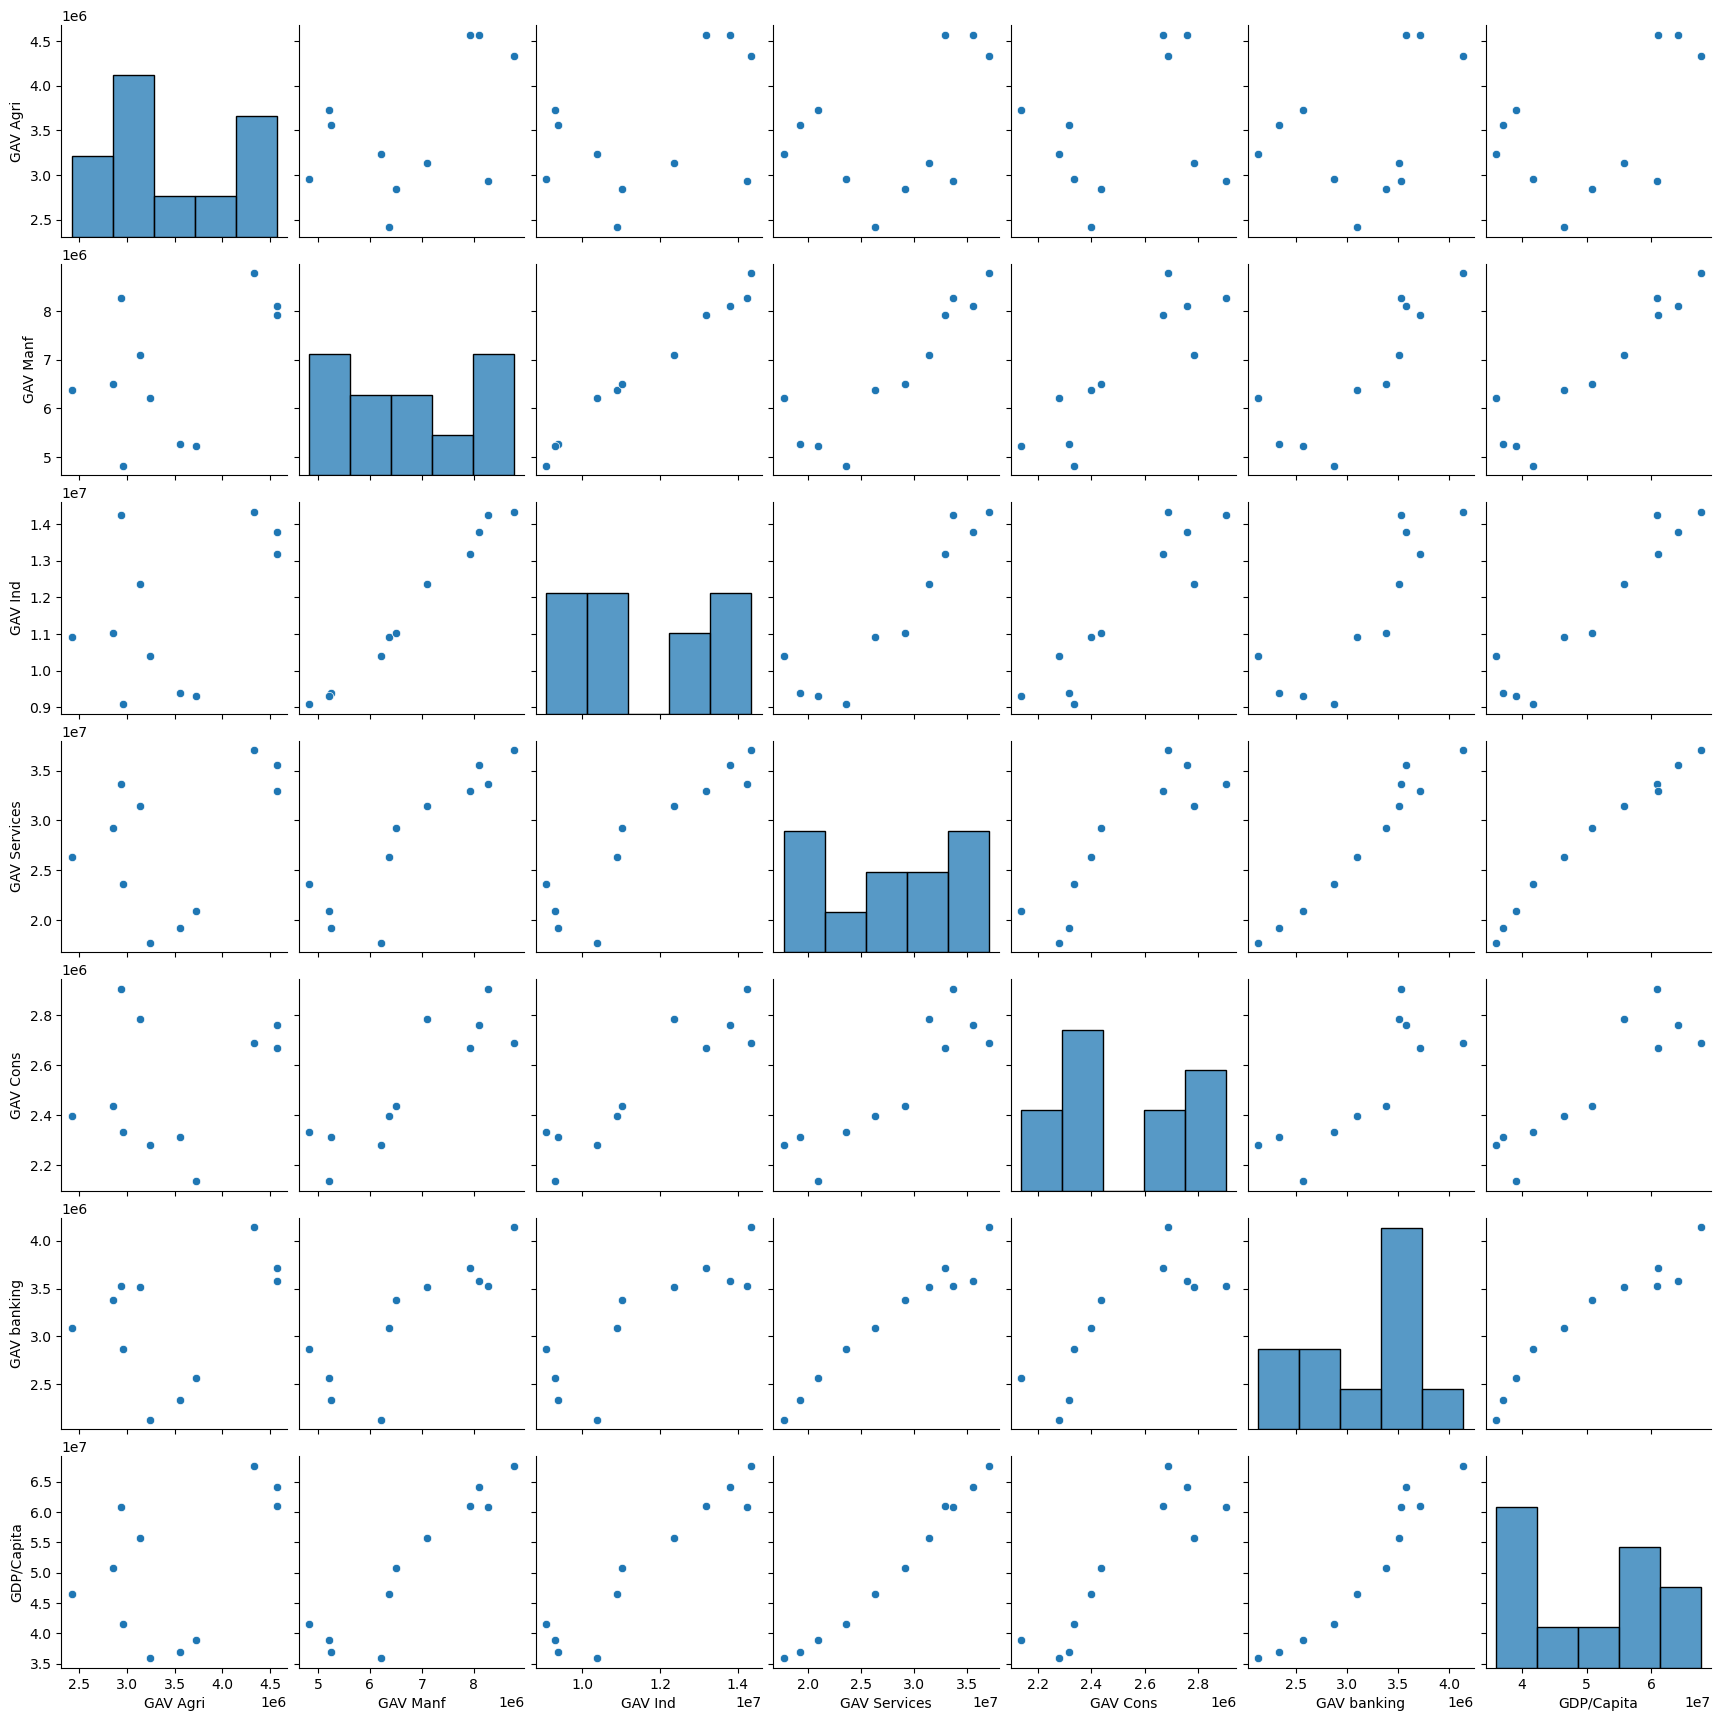

In [69]:
import seaborn as sns
import pandas as pd


# Select the variables you want to include in the scatterplot matrix
variables =['GAV Agri','GAV Manf','GAV Ind','GAV Services','GAV Cons','GAV banking','GDP/Capita']

# Create a subset of the data frame with the selected variables
subset_df = maha[variables]

# Create the scatterplot matrix
sns.pairplot(subset_df)

# Show the plot
plt.show()


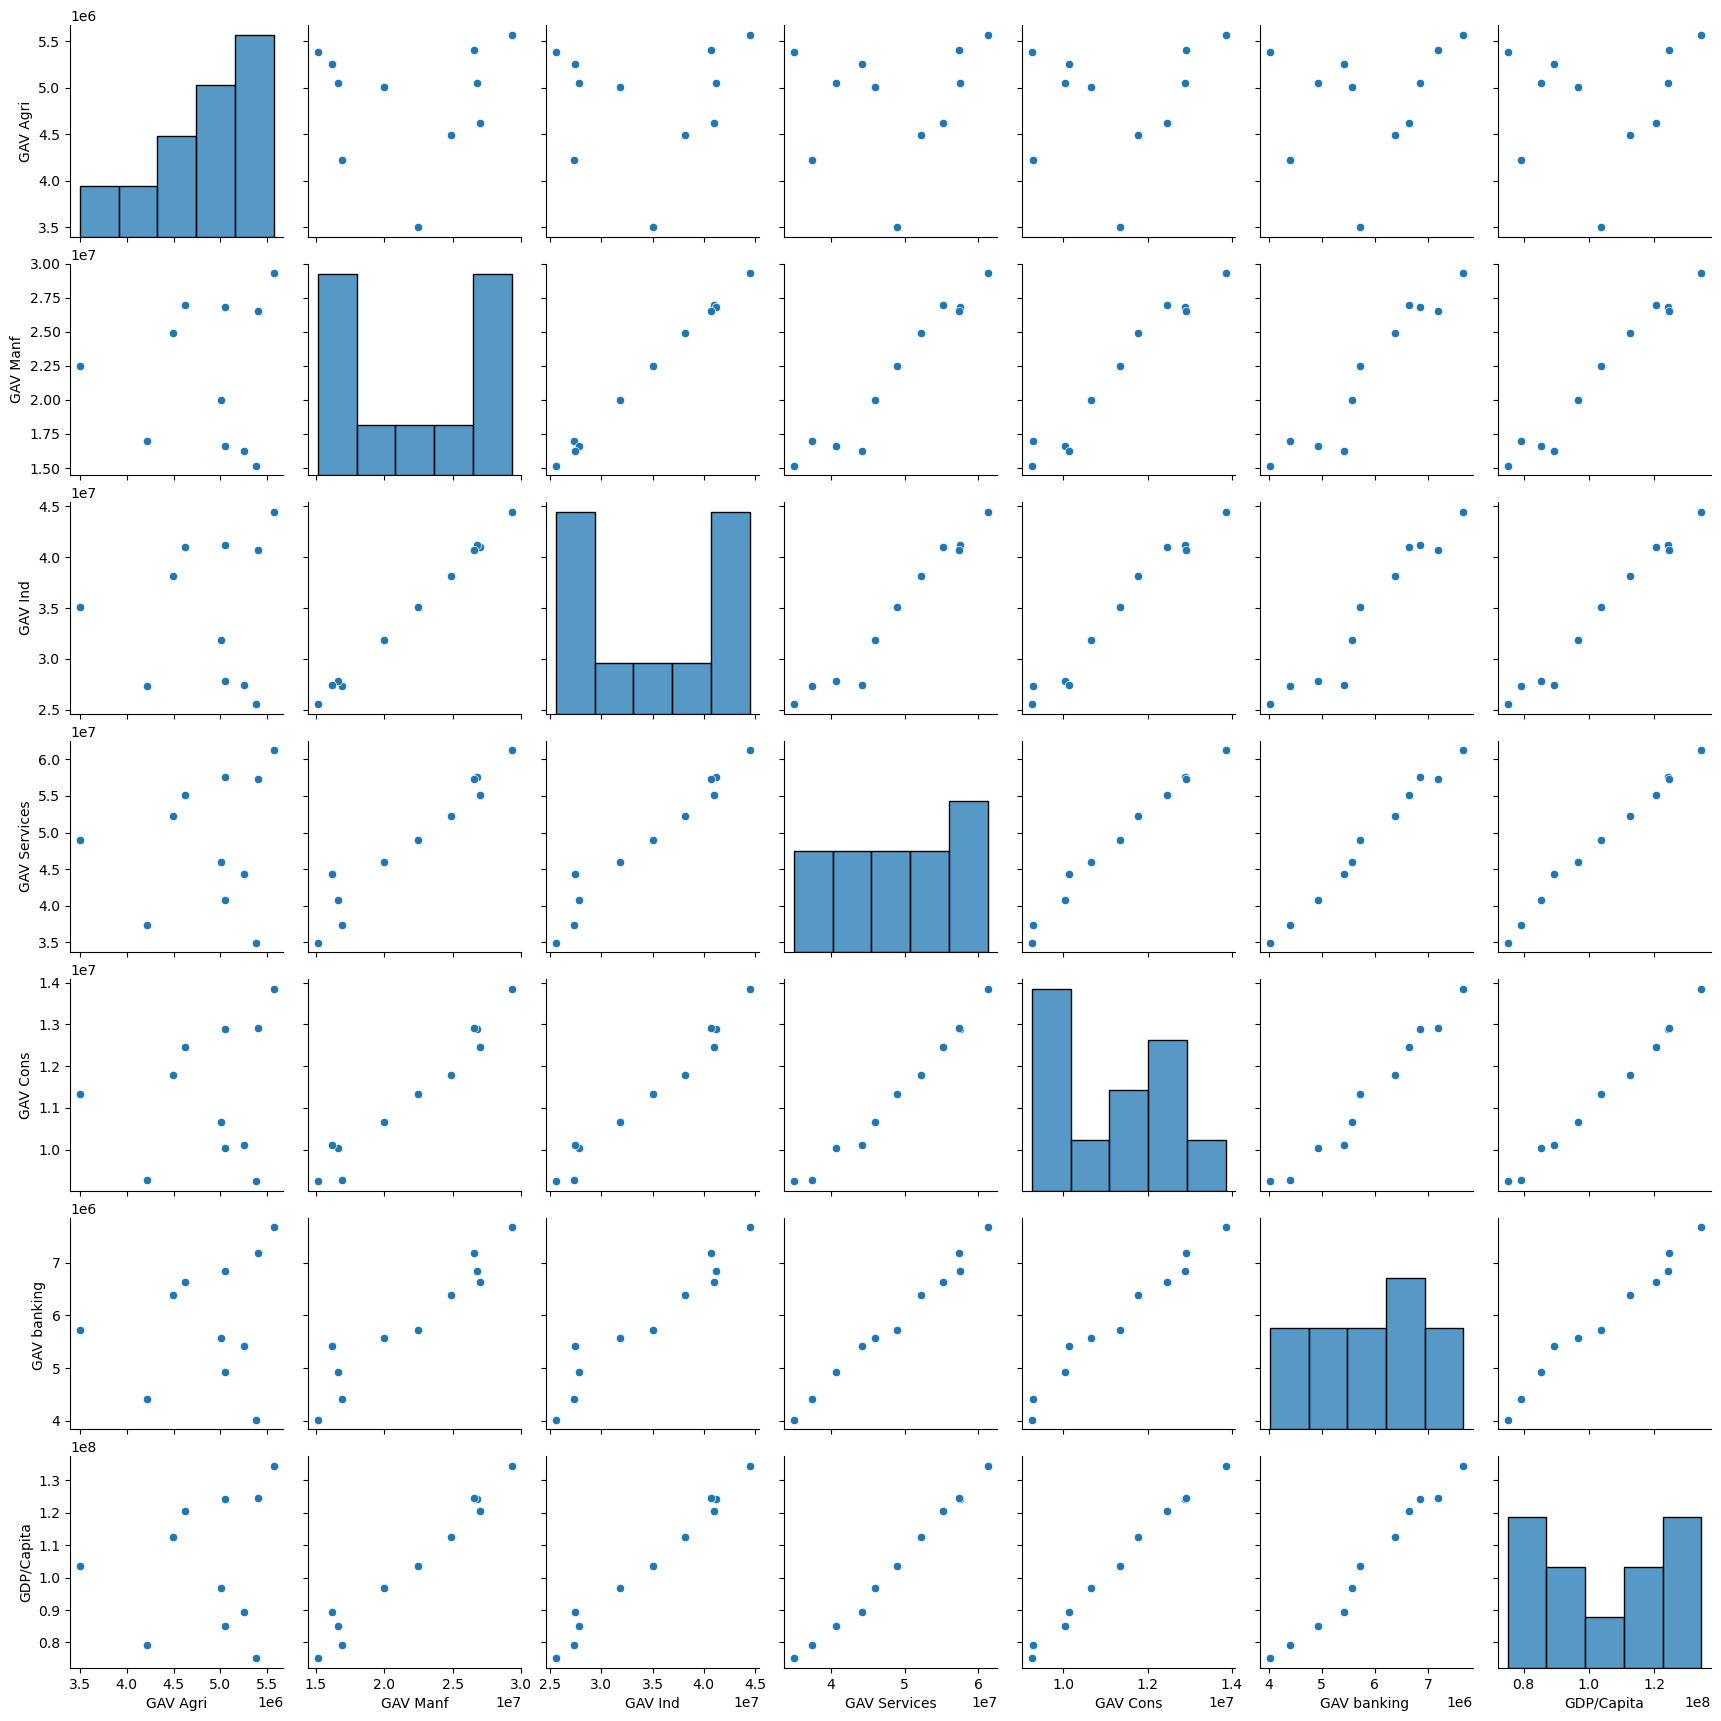

In [70]:
import seaborn as sns
import pandas as pd


# Select the variables you want to include in the scatterplot matrix
variables =['GAV Agri','GAV Manf','GAV Ind','GAV Services','GAV Cons','GAV banking ','GDP/Capita']

# Create a subset of the data frame with the selected variables
subset_df = MP[variables]

# Create the scatterplot matrix
sns.pairplot(subset_df)

# Show the plot
plt.show()

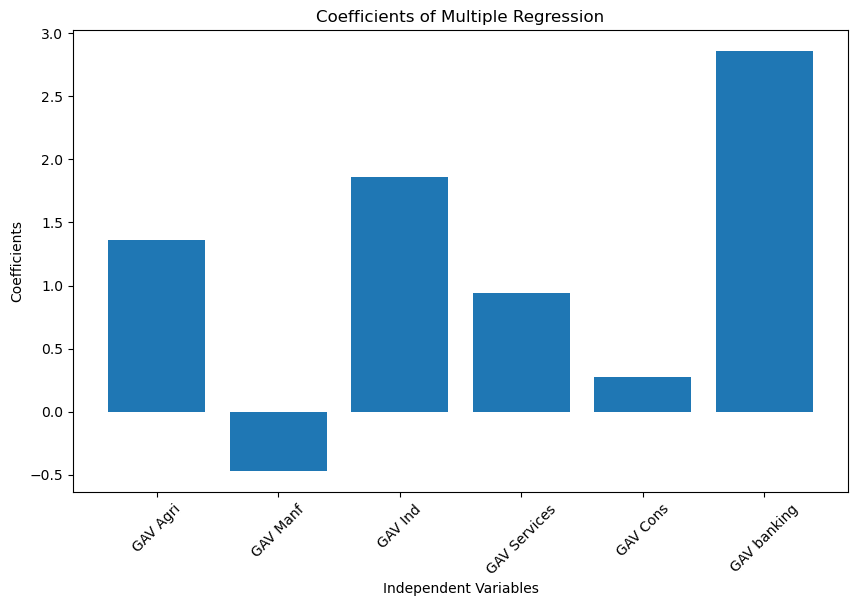

In [71]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have a list or array 'coefficients' containing the coefficients
# and a list or array 'variables' containing the names of the independent variables

# Create a bar plot of the coefficients
variables=['GAV Agri','GAV Manf','GAV Ind','GAV Services','GAV Cons','GAV banking']
plt.figure(figsize=(10, 6))
plt.bar(variables, MH_coeff)
plt.xlabel('Independent Variables')
plt.ylabel('Coefficients')
plt.title('Coefficients of Multiple Regression')
plt.xticks(rotation=45)
plt.show()


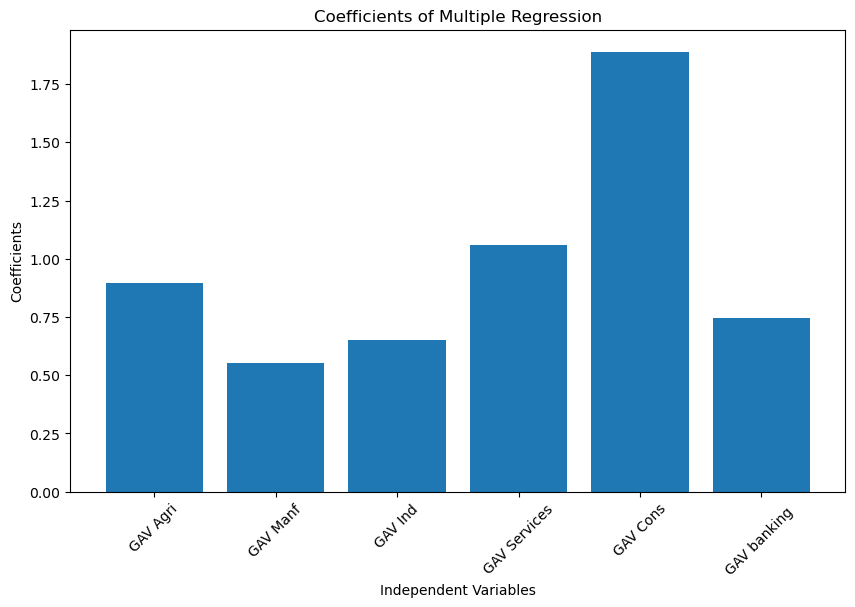

In [72]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have a list or array 'coefficients' containing the coefficients
# and a list or array 'variables' containing the names of the independent variables

# Create a bar plot of the coefficients
variables=['GAV Agri','GAV Manf','GAV Ind','GAV Services','GAV Cons','GAV banking ']
plt.figure(figsize=(10, 6))
plt.bar(variables, MP_coeff)
plt.xlabel('Independent Variables')
plt.ylabel('Coefficients')
plt.title('Coefficients of Multiple Regression')
plt.xticks(rotation=45)
plt.show()

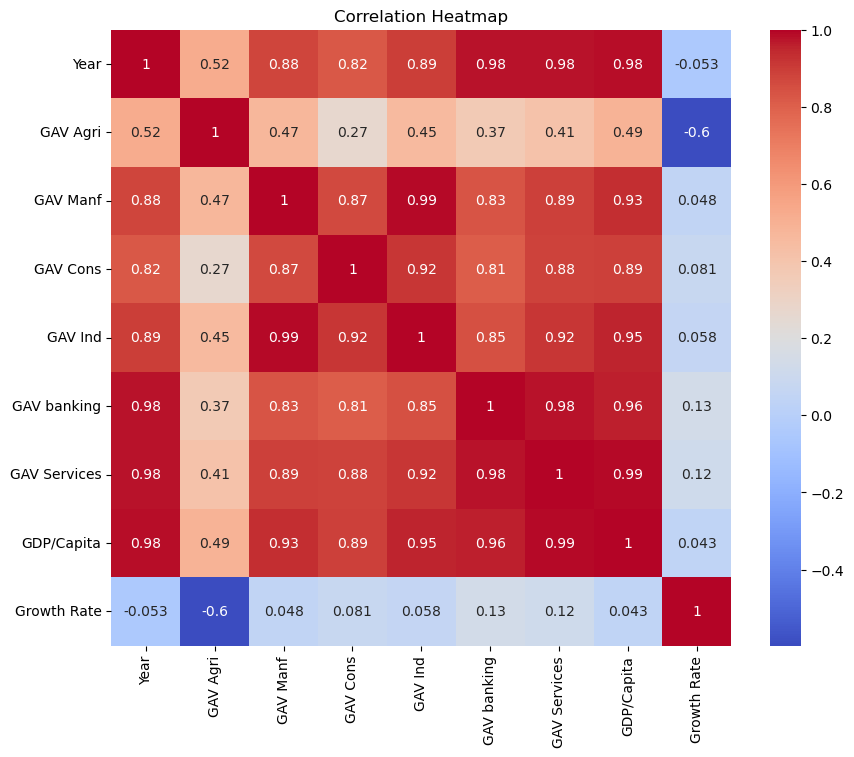

In [73]:




# Calculate the correlation matrix
corr_matrix = maha.corr()

# Create a heatmap using the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


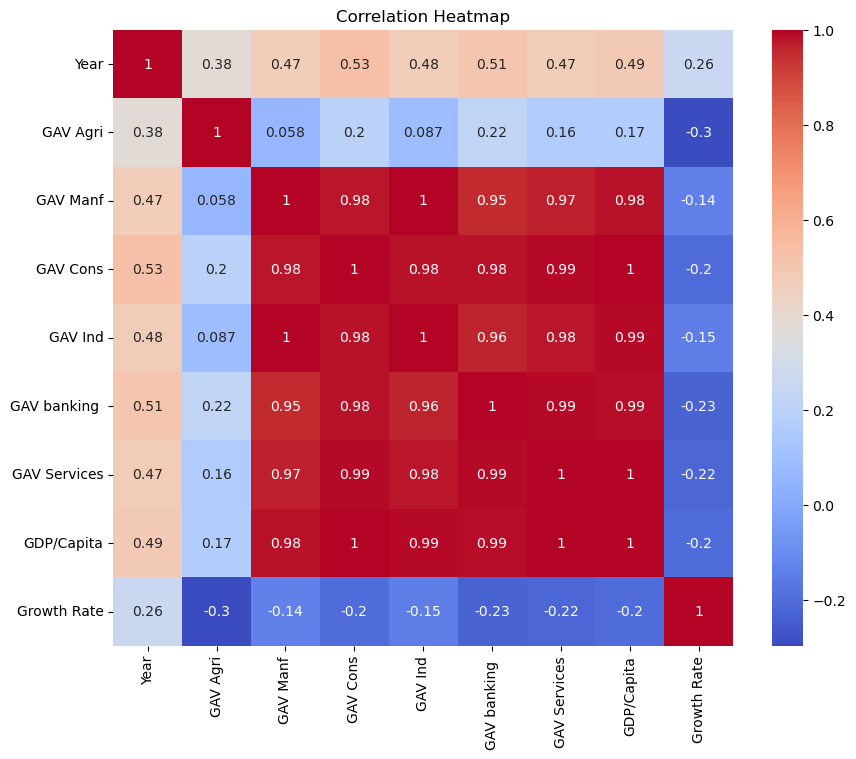

In [74]:


# Calculate the correlation matrix
corr_matrix = MP.corr()

# Create a heatmap using the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
